In [1]:
%run preamble_2.py

%matplotlib inline

!mkdir -p images tables results

from IPython.display import HTML

In [2]:
#
# Uniform Baseline
#
DS_NAME = "Uniform Distribution"

# 1000 batches a 100 samples
DS_DATA = [ np.random.uniform(10, 100, size=100) for i in range(1000) ]
DS_QUANTILES = [0, .25, 0.5, 0.75, .9, .95, .99, .995, .999, .9999, .99999, 1 ]

In [3]:
# Run Configuration

# HDR
CLASSES[3].M = 10**8

# Prom
CLASSES[1].thresholds = np.linspace(0,100,10)

In [4]:
STATS = evaluate_all(DS_DATA, DS_QUANTILES)

# exact
Insert .........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [5]:
save_results(STATS, DS_NAME)

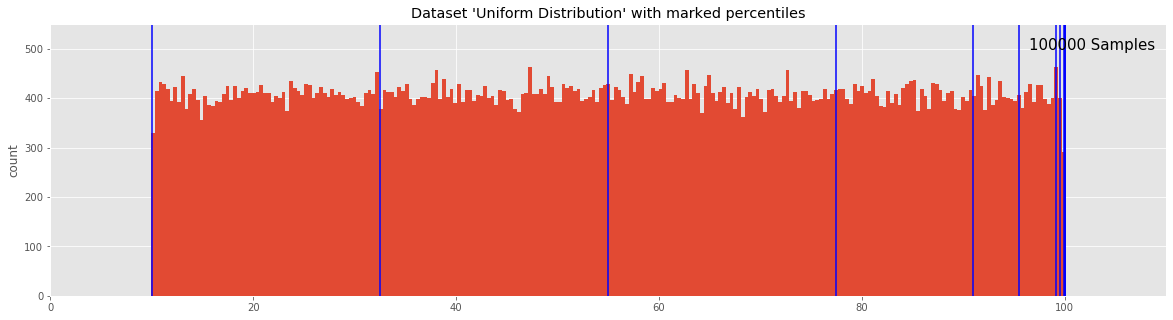

In [6]:
X = np.concatenate(DS_DATA)
Qs = [STATS["exact"]["quantiles"][q] for q in DS_QUANTILES ]

xmin=0
xmax=110

plt.figure(figsize=(20,5))
ax = plt.subplot(1,1,1)
ax.hist(X, bins=np.linspace(xmin, xmax, 300));
ax.text(0.99, 0.95, '{} Samples'.format(len(X)), horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)
for y in Qs: ax.axvline(y, color="blue")
ax.set_ylabel("count")
plt.xlim(xmin ,xmax)

plt.ylim(0,550)
plt.title("Dataset '{}' with marked percentiles".format(DS_NAME))
plt.savefig("images/" + DS_NAME + "_distribution_percentiles", bbox_inches="tight")